In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
duration = 1
cycles = 5
f = 1000
fs = 48000
T = 1/f
plotDur = cycles*T
precision = 20
totalSamples = 48000
five_cycles_samples = cycles*int(fs/f)

In [5]:
x = np.linspace(0,plotDur,totalSamples)
y = 2*np.sin(2*np.pi*f*x)

In [6]:
Ts = 1/fs
def sampleVal(n):
  val = 2*np.sin(2*np.pi*f*n*Ts)
  return round(val,precision)

In [7]:
samples = []
for i in range(totalSamples):
  sample = sampleVal(i) 
  samples.append(sample)
samples = np.array(samples)

In [29]:
def round_to_int(num):
    int_num = int(num) 
    frac = abs(num - int_num) 
    if frac >= 0.5:
        return int_num + 1 if num >= 0 else int_num - 1
    return int_num

def decToBinary(dec):
   return np.binary_repr(dec,17)

def fixedPoint(num, m, n):
  scale = 2**n
  fixed_int = round_to_int(num*scale)
  return decToBinary(fixed_int)
def quantize(samples,m,n):
  arr = []
  for i in range(len(samples)):
    arr.append(fixedPoint(samples[i],m,n))
  arr = np.array(arr,dtype=str)
  return arr


In [35]:
q_3_14 = quantize(samples,3,14)
q_5_12 = quantize(samples,5,12)

np.savetxt('q_3_14.txt', q_3_14,fmt='%s')
np.savetxt('q_5_12.txt', q_5_12,fmt='%s')

In [ ]:
def addVals():
    arr= []
    for i in range(totalSamples):
        converted_val = fixedPoint(q_3_14[i],15,2)
        arr.append(converted_val+q_15_2[i])
    arr = np.array(arr)
    return arr

def subVals():
    arr = []
    for i in range(totalSamples):
        converted_val = fixedPoint(q_3_14[i],15,2)
        arr.append(converted_val-q_15_2[i])
    arr = np.array(arr)
    return arr

def mulVals():
    arr = []
    for i in range(totalSamples):
        val = q_3_14[i] * q_15_2[i]
        arr.append(fixedPoint(val,18,16))
    arr = np.array(arr)
    return arr

In [11]:
add_vals = addVals()
sub_vals = subVals()
mul_vals = mulVals()

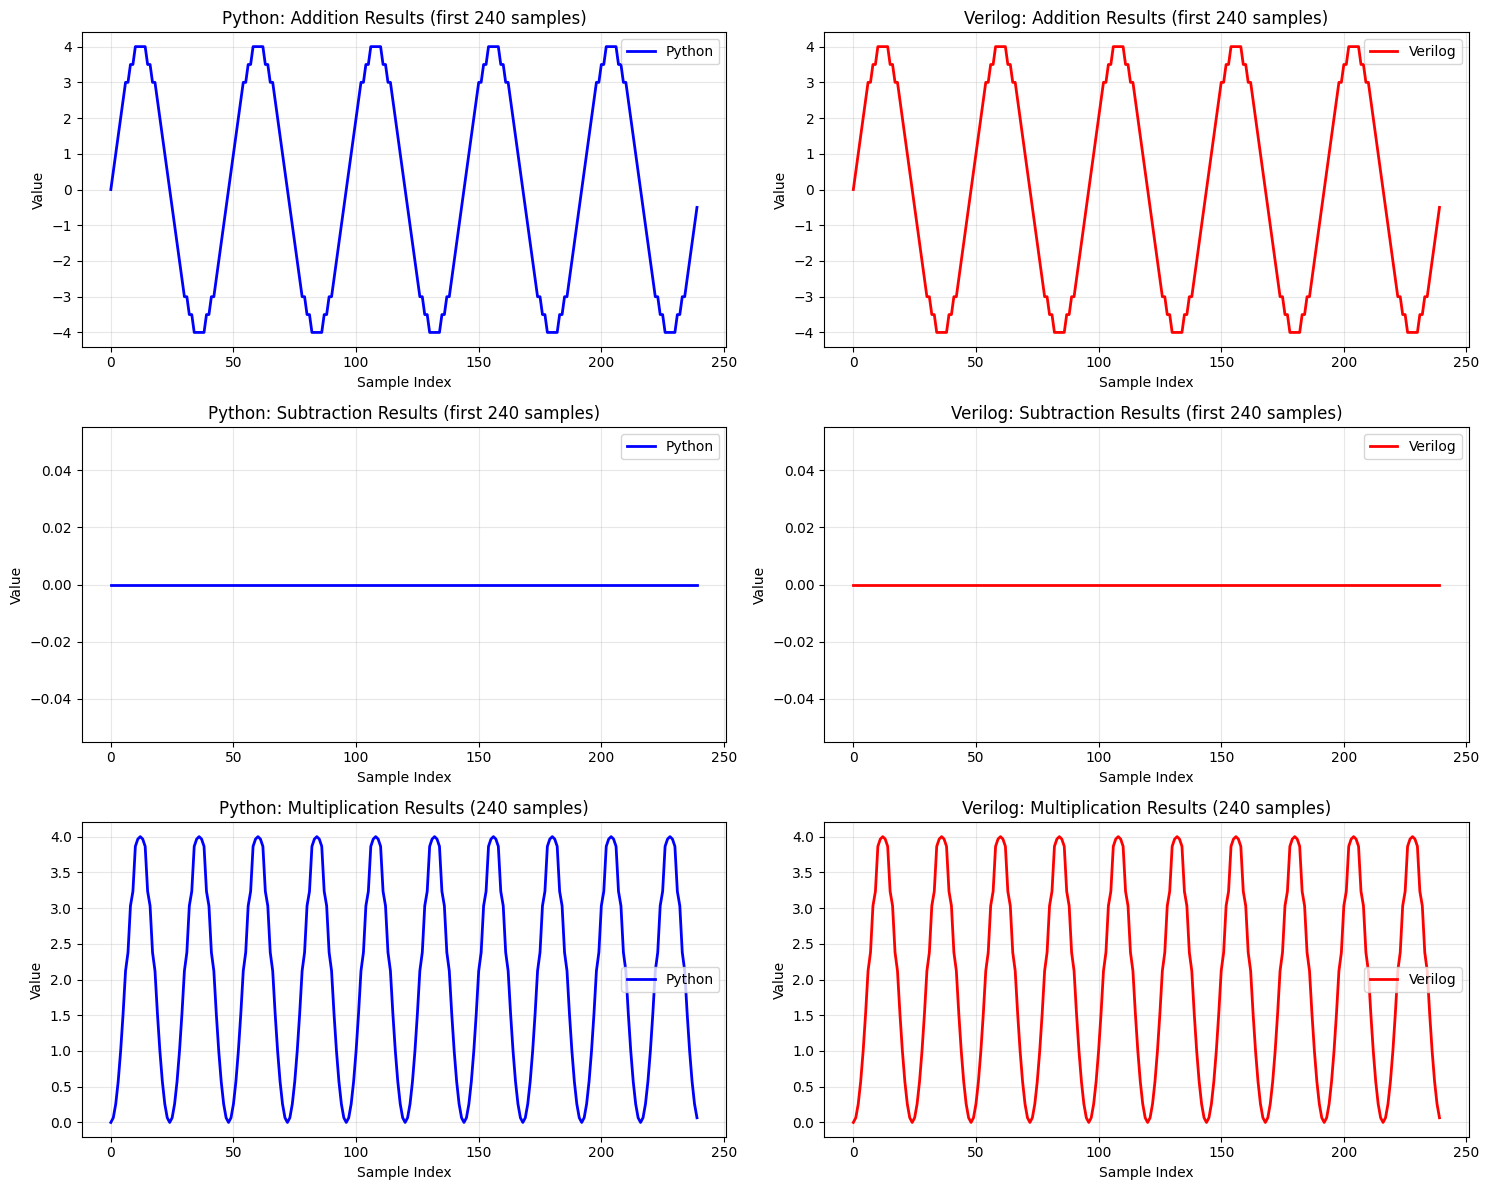

In [12]:
add_vals = addVals()  # Python results
sub_vals = subVals()
mul_vals = mulVals()

add_vals_verilog = np.loadtxt("add.txt")
sub_vals_verilog = np.loadtxt("sub.txt")
mul_vals_verilog = np.loadtxt("mul.txt")

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Plot 1: Addition comparison
axes[0, 0].plot(add_vals[:five_cycles_samples], 'b-', linewidth=2, label='Python')
axes[0, 0].set_title('Python: Addition Results (first 240 samples)')
axes[0, 0].set_xlabel('Sample Index')
axes[0, 0].set_ylabel('Value')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend()

axes[0, 1].plot(add_vals_verilog[:five_cycles_samples], 'r-', linewidth=2, label='Verilog')
axes[0, 1].set_title('Verilog: Addition Results (first 240 samples)')
axes[0, 1].set_xlabel('Sample Index')
axes[0, 1].set_ylabel('Value')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend()

# Plot 2: Subtraction comparison
axes[1, 0].plot(sub_vals[:five_cycles_samples], 'b-', linewidth=2, label='Python')
axes[1, 0].set_title('Python: Subtraction Results (first 240 samples)')
axes[1, 0].set_xlabel('Sample Index')
axes[1, 0].set_ylabel('Value')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend()

axes[1, 1].plot(sub_vals_verilog[:five_cycles_samples], 'r-', linewidth=2, label='Verilog')
axes[1, 1].set_title('Verilog: Subtraction Results (first 240 samples)')
axes[1, 1].set_xlabel('Sample Index')
axes[1, 1].set_ylabel('Value')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].legend()

# Plot 3: Multiplication comparison
axes[2, 0].plot(mul_vals[:five_cycles_samples], 'b-', linewidth=2, label='Python')
axes[2, 0].set_title('Python: Multiplication Results (240 samples)')
axes[2, 0].set_xlabel('Sample Index')
axes[2, 0].set_ylabel('Value')
axes[2, 0].grid(True, alpha=0.3)
axes[2, 0].legend()

axes[2, 1].plot(mul_vals_verilog[:five_cycles_samples], 'r-', linewidth=2, label='Verilog')
axes[2, 1].set_title('Verilog: Multiplication Results (240 samples)')
axes[2, 1].set_xlabel('Sample Index')
axes[2, 1].set_ylabel('Value')
axes[2, 1].grid(True, alpha=0.3)
axes[2, 1].legend()

plt.tight_layout()
plt.show()

In [13]:
cntA=0
cntB=0
cntC=0

for i in range(totalSamples):
    if(add_vals[i]==add_vals_verilog[i]):cntA+=1
    if(sub_vals[i]==sub_vals_verilog[i]):cntB+=1
    if(mul_vals[i]==mul_vals_verilog[i]):cntC+=1

print(cntA,cntB,cntC)

48000 48000 48000
